**Libraries**

In [16]:
import numpy as np
import matplotlib.pyplot as plt

**Generate Data**

In [24]:
# Generate training data
np.random.seed(42)
X = np.random.uniform(-3, 3, (1000, 1)) # 1000 input data in the range (-3, 3)
y = X ** 2

# Generate test data
X_test = np.random.uniform(-3, 3, (100, 1))
y_test = X_test ** 2

**The architecture of the MLP**

In [25]:
input_size = 1
hidden_size = 10
output_size = 1

**Initialization**

In [26]:
weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

**Training**

In [27]:
# Set hyperparameters
learning_rate = 0.01
epochs = 2000

# Training
for epoch in range(epochs):
  hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden # Calculate input to hidden layer
  hidden_layer_output = np.maximum(0, hidden_layer_input) # RelU activation function
  output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output # Calculate input to output layer
  predicted_y = output_layer_input

  # Calculate loss(Mean Squared Error loss)
  loss = np.mean((predicted_y - y) **2)

  #Backpropagation
  grad_output = 2 * (predicted_y - y) / X.shape[0]

  grad_weights_hidden_output = np.dot(hidden_layer_output.T, grad_output) # Gradient of loss weights in hidden-output layer
  grad_bias_output = np.sum(grad_output, axis=0, keepdims=True) # Gradient of loss bias in output layer

  grad_hidden_output = np.dot(grad_output, weights_hidden_output.T) # Gradient of loss hidden layer output

  grad_hidden_input = grad_hidden_output * (hidden_layer_input > 0) # Gradient of loss hidden layer input

  grad_weights_input_hidden = np.dot(X.T, grad_hidden_input) # Gradient of loss weights in input-hidden layer
  grad_bias_hidden = np.sum(grad_hidden_input, axis=0, keepdims=True) # Gradient of loss bias in hidden layer

  # Update weights and biases using gradients and learning rate
  weights_input_hidden -= learning_rate * grad_weights_input_hidden # Update weights in input-hidden layer
  bias_hidden -= learning_rate * grad_bias_hidden # Update bias in hidden layer
  weights_hidden_output -= learning_rate * grad_weights_hidden_output # Update weights in hidden-output layer
  bias_output -= learning_rate * grad_bias_output # Update bias in output layer

  # Print loss every 100 epochs
  if epoch % 100 == 0:
    print(f'Epoch {epoch}, Loss: {loss}')

Epoch 0, Loss: 9.35762194335822
Epoch 100, Loss: 5.819889076558568
Epoch 200, Loss: 5.250473860684926
Epoch 300, Loss: 4.974190050143854
Epoch 400, Loss: 4.632254303234264
Epoch 500, Loss: 3.9939075739652536
Epoch 600, Loss: 2.639179110443445
Epoch 700, Loss: 1.8532420244163126
Epoch 800, Loss: 1.3745514618692283
Epoch 900, Loss: 1.0586568944137997
Epoch 1000, Loss: 0.8372965578658783
Epoch 1100, Loss: 0.6720655724972386
Epoch 1200, Loss: 0.5428448818258601
Epoch 1300, Loss: 0.4410161512297359
Epoch 1400, Loss: 0.360286983167081
Epoch 1500, Loss: 0.29816952715591055
Epoch 1600, Loss: 0.250419460481235
Epoch 1700, Loss: 0.21334667465335116
Epoch 1800, Loss: 0.18398772464483068
Epoch 1900, Loss: 0.16003137940874895


**Testing**

In [31]:
hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden # Calculate input to hidden layer for test data
hidden_layer_output_test = np.maximum(0, hidden_layer_input_test) # Apply RelU activation function for test data
output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output # Calculate input to output layer for test data
predicted_y_test = output_layer_input_test

# Comput loss on the test data(Mean Squared Error loss for test data)
test_loss = np.mean((predicted_y_test - y_test) ** 2)

print(f'Test Loss: {test_loss}')


Test Loss: 0.1487251580649096


**Ploting the predicted and the real values**

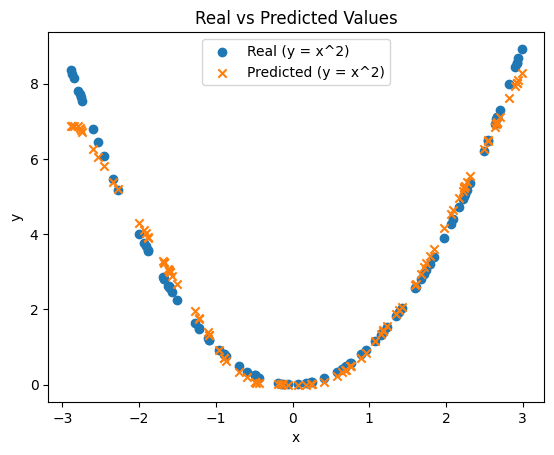

In [32]:
plt.scatter(X_test, y_test, label='Real (y = x^2)')
plt.scatter(X_test, predicted_y_test, label='Predicted (y = x^2)', marker='x')
plt.title('Real vs Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()